# Exploring Bangladesh 🌏

Located in South Asia, bordered by India to the north, east, and west, and Myanmar to the southeast and has a total area of 147,570 square kilometers, the eighth most populous country in the world and a population of around 170 million.

### Hansen Forest Cover Change 2014 - 2019 & Intact Forest Landscapes

## About:

Bangladesh has a diverse range of ecosystems, including tropical forests and wetlands.

- One of the most important ecosystems in Bangladesh is the Sundarbans mangrove forest, which is home to a range of endangered species. The forest also provides important ecosystem services, such as carbon sequestration and storm protection for coastal communities.

- The freshwater swamp forests in Bangladesh are important ecosystems that provide a range of ecological and economic benefits. These forests are found in the low-lying areas of the country, particularly in the northeastern region, and are characterized by their unique vegetation and waterlogged soils.

In [1]:
import geojson
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
import requests, io
from IPython.display import display, Markdown


%matplotlib inline
import os

In [2]:
# ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# earth engine visualizations
import ee
import geemap

In [3]:
def getdf(input):
  file = input
  return gpd.read_file(file)

In [4]:
bangladesh = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\BGD_AL2_Bangladesh.json'
bangladesh = getdf(bangladesh)

In [5]:
terrestrial_ecoregion = r'C:\Users\maazi\Desktop\Outreachy 2023 mojaglobal\TerrestrialEcoregionsoftheWorld_WWF.geojson'
terrestrial_ecoregion = getdf(terrestrial_ecoregion)

## Bangladesh's Freshwater Swamp Forest & Sundarbans Mangroves

In [8]:
forest_freshwater_swamp = terrestrial_ecoregion[terrestrial_ecoregion['ECO_NAME'] == 'Sundarbans freshwater swamp forests']
forest_sundarbans_mangroves = terrestrial_ecoregion[terrestrial_ecoregion['ECO_NAME'] == 'Sundarbans mangroves']

In [9]:
forest_freshwater_swamp = forest_freshwater_swamp.clip(bangladesh)
forest_sundarbans_mangroves = forest_sundarbans_mangroves.clip(bangladesh)

C:\Users\maazi\anaconda3\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
C:\Users\maazi\anaconda3\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [10]:
ban_forest = pd.concat([forest_freshwater_swamp, forest_sundarbans_mangroves])

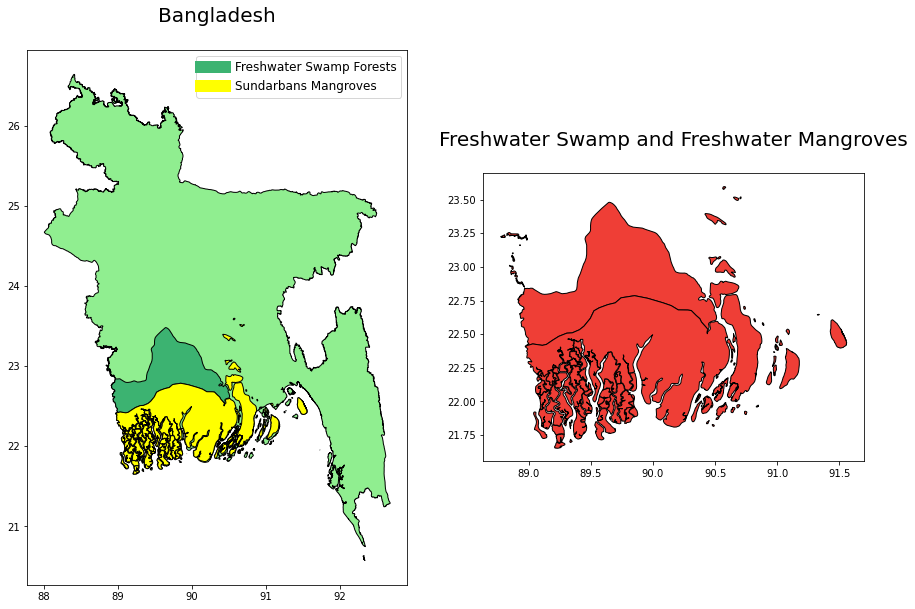

In [15]:
from matplotlib.lines import Line2D

# Plotting in the maps
fig, axes = plt.subplots(1,2, figsize=(15,15))

# first map axes[0]
axes[0].set_title('Bangladesh\n', fontsize=20)
bangladesh.plot(ax=axes[0], color='lightgreen', edgecolor='black')
forest_freshwater_swamp.plot(ax=axes[0], color="mediumseagreen", edgecolor="black")
forest_sundarbans_mangroves.plot(ax=axes[0], color="yellow", edgecolor="black")
legend_elements = [Line2D([0], [0], color='mediumseagreen', lw=12, label='Freshwater Swamp Forests'),
                   Line2D([0], [0], color='yellow', lw=12, label='Sundarbans Mangroves')]
axes[0].legend(handles=legend_elements, fontsize=12)

# third map axes[1]
axes[1].set_title('Freshwater Swamp and Freshwater Mangroves\n', fontsize=20)
ban_forest.plot(ax=axes[1], color='#EF3E36', edgecolor='black')

plt.show()

In [8]:
import json
import pandas as pd

with open('forest_zone.geojson') as fo:
    data_str = fo.read()
data = json.loads(data_str) 
df = pd.DataFrame(data)

In [14]:
gdf = gpd.GeoDataFrame.from_features(df['features'])

In [16]:
forest_zone = gdf.clip(bangladesh)

C:\Users\maazi\anaconda3\lib\site-packages\geopandas\geodataframe.py:2233: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)
C:\Users\maazi\anaconda3\lib\site-packages\geopandas\tools\clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [24]:
forest_zone

,geometry,FID,REGION
9,"MULTIPOLYGON (((89.45330 22.38192, 89.45030 22...",9,10


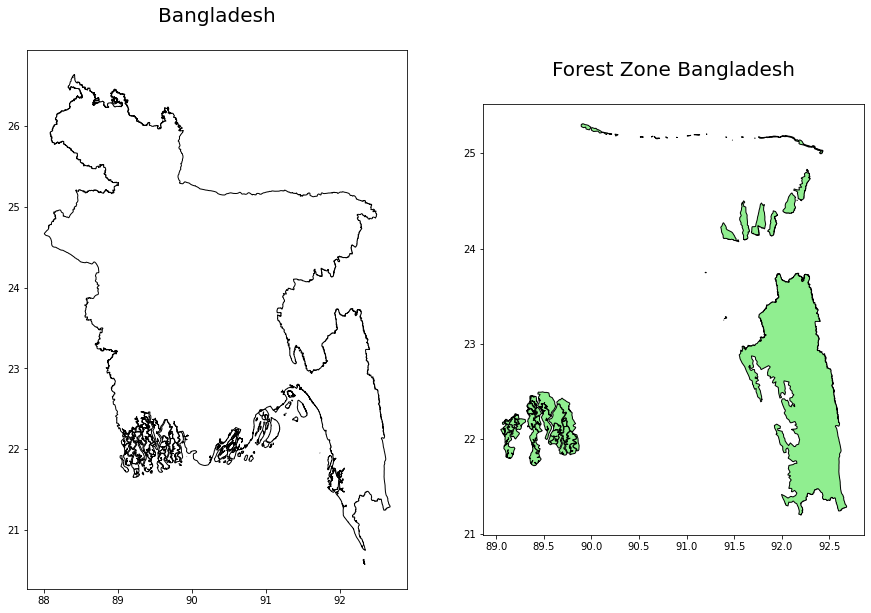

In [52]:
from matplotlib.lines import Line2D

# Plotting in the maps
fig, axes = plt.subplots(1,2, figsize=(15,15))

# first map axes[0]
axes[0].set_title('Bangladesh\n', fontsize=20)
bangladesh.plot(ax=axes[0], color='none', edgecolor='black')

# third map axes[1]
axes[1].set_title('Forest Zone Bangladesh\n', fontsize=20)
forest_zone.plot(ax=axes[1], color='lightgreen', edgecolor='black')

plt.show()

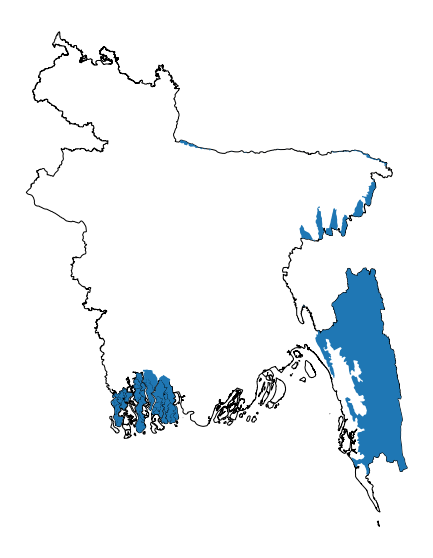

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));


# plot the base map of Bangladesh
bangladesh.plot(ax=ax, color='none', edgecolor='black')

# plot the forest zone on top of the base map
forest_zone.plot(ax=ax, legend=True)

plt.axis('off')
plt.show()

In [ ]:
ee.Authenticate()
ee.Initialize()

In [39]:
ban_region = ee.Geometry.Rectangle(90.0, 20.0, 93.0, 27.0)

# Loading dataset - studying roi and yoi.
hansen = ee.Image('UMD/hansen/global_forest_change_2019_v1_7').select('treecover2000', 'loss', 'gain', 'lossyear').clip(ban_region)
hansen2014 = hansen.updateMask(hansen.select('lossyear').gte(14))
hansen2019 = hansen.updateMask(hansen.select('lossyear').gte(19))
""
# Calculating forest cover in 2014 and 2019
forest2014 = hansen2014.select('treecover2000').divide(100)
forest2019 = hansen2019.select('treecover2000').divide(100)

# Calculating forest loss and gain
loss = hansen2014.select('loss')
gain = hansen2019.select('gain')

# Define the visualization parameters for the forest cover maps
forest_vis = {
    'min': 0,
    'max': 1,
    'palette': ['000000', '00FF00']
}

# Define the visualization parameters for the loss and gain maps
loss_gain_vis = {
    'min': 0,
    'max': 1,
    'palette': ['FF0000', '00FF00']
}

# Creating a map and add the forest cover maps, loss map, and gain map
Map = geemap.Map()
Map.centerObject(ban_region, 7)
Map.addLayer(forest2014, forest_vis, 'Forest cover 2014')
Map.addLayer(forest2019, forest_vis, 'Forest cover 2019')
Map.addLayer(loss, loss_gain_vis, 'Forest loss')
Map.addLayer(gain, loss_gain_vis, 'Forest gain')
Map.add_legend(title='Forest Cover Legend', legend_dict={'Forest': '00FF00'})
Map.add_legend(title='Forest Loss/Gain Legend', legend_dict={'Forest loss': 'FF0000', 'Forest gain': '00FF00'})

In [ ]:
Map.addLayerControl()
Map